In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [98]:
X, y = make_blobs(n_samples=1000, centers=2,
                        n_features=2, random_state=1)

In [99]:
y[y == 0] = -1

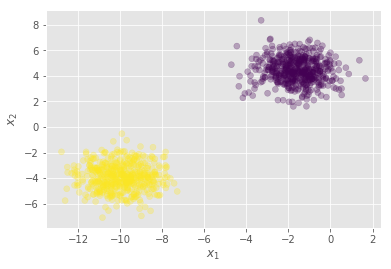

In [100]:
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(X.T[0], X.T[1], c=y+1, alpha=0.3);

In [101]:
m, n = X.shape

In [102]:
y = y.reshape(-1, 1) * 1.  # force float type

In [103]:
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

In [104]:
H.shape

(1000, 1000)

Our optimization problem (dual) is:

\begin{align} \max\limits_{\boldsymbol\lambda} & \sum\limits_{i=1}^m \lambda_i - \frac{1}{2}\sum\limits_{i=1}^m \sum\limits_{j=1}^m \lambda_i \lambda_j y^{(i)}y^{(j)} x^{(i)T}x^{(j)} \\ \text{s.t. } & \lambda_i \geq 0 \\ & \sum\limits_{i=1}^m \lambda_i y^{(i)} = 0 \end{align}

However, the optimization library wants:

\begin{align}
    & \min \frac{1}{2} x^TPx + q^Tx
    \\
     \text{s.t. } & Gx \leq h 
    \\
    & \ Ax = b
\end{align}

We have reframed our dual as:

\begin{align}
    \min\limits_{\boldsymbol\lambda} & \frac{1}{2}\boldsymbol\lambda^T \textbf{H}\boldsymbol\lambda - \textbf{1}^T \boldsymbol\lambda \\
    \text{s.t. } & -\lambda_i \leq 0 \\
    & \textbf{y}^T \boldsymbol\lambda = 0
\end{align}

Therefore the correspondence is:

\begin{align}
    P &= \textbf{H} \\
    x &= \boldsymbol\lambda \\
    q &= -\textbf{1} \\
    h &= \textbf{0} \\
    b &= \textbf{0} \\
    A &= \textbf{y} \\
    G &= -\textbf{I}
\end{align}

In [105]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [146]:
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))
G = cvxopt_matrix(-np.eye(m))

In [147]:
cvxopt_solvers.options['show_progress'] = False
sol = cvxopt_solvers.qp(P, q, G, h, A, b)

In [148]:
lambd = np.array(sol['x'])

In [149]:
w = ((y * lambd).T @ X).reshape(-1,1)

In [150]:
ind = np.where(y == -1)[0]

In [151]:
w.shape, X[ind].shape

((2, 1), (500, 2))

In [152]:
p1 = X[ind] @ w

In [153]:
ind = np.where(y == 1)[0]
p2 = X[ind] @ w

In [154]:
p1.shape

(500, 1)

In [155]:
b = (max(p1) + min(p2)) / 2

In [156]:
b

array([1.35285595])

In [157]:
w

array([[-0.23300366],
       [-0.26952424]])

In [158]:
w[0]

array([-0.23300366])

In [159]:
min(y*(X @ w + b))

array([-1.70571191])

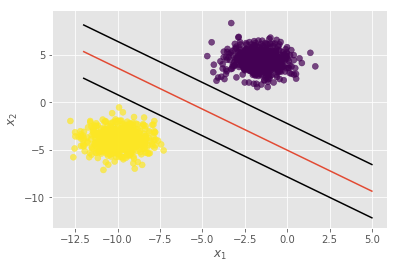

In [163]:
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

xx = np.linspace(-12, 5)
slope = -w[0] / w[1]
intercept = b / w[1]
yy = slope * xx + intercept
plt.plot(xx, yy, '-')

yy = slope * xx + intercept + 1 / np.linalg.norm(w)
plt.plot(xx, yy, 'k-')

yy = slope * xx + intercept - 1 / np.linalg.norm(w)
plt.plot(xx, yy, 'k-')

plt.scatter(X.T[0], X.T[1], c=y.squeeze()+1, alpha=0.7);

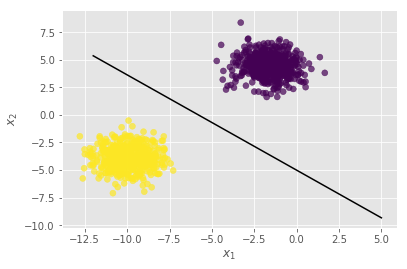

In [165]:
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

xx = np.linspace(-12, 5)
slope = -w[0] / w[1]
intercept = b / w[1]
yy = slope * xx + intercept
plt.plot(xx, yy, 'k-')

plt.scatter(X.T[0], X.T[1], c=y.squeeze()+1, alpha=0.7);

In [83]:
from sklearn.svm import SVC

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [84]:
clf = SVC(kernel='linear')

In [85]:
clf.fit(X, y)

/home/rahul/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [86]:
clf.coef_

array([[-0.23300366, -0.26952425]])

In [87]:
clf.intercept_

array([-1.35285598])